# Austin Reed

## CLIM680 Final Project- Fall 2021

Step 1: import all necessary packages!

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks

In [3]:
f= '/scratch/areed29/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
#print(DS1)
data_lat= DS1.latitude.values #latitude array
data_lon= DS1.longitude.values #longitude array
nlats = len(data_lat[:]) #length of latitude array
nlons = len(data_lon[:]) #length of longitude array
time = DS1.time #time array
ds_mean = DS1.mean(dim=('expver')) # average over the expver variable (axis 1) to get rid of it for now and get a 3D array of time,lat,lon
total_cloud_cover = ds_mean.tcc #total cloud cover
total_precip= ds_mean.tp #total precipitation
column_cloud_wv = ds_mean.tcwv #total column cloud liquid water

### Assignment 1, with modifications: Multi-panel contour plots of the first time

In [4]:
plot_fields = [total_cloud_cover[0,:,:],total_precip[0,:,:],column_cloud_wv[0,:,:]]
print(plot_fields)

[<xarray.DataArray 'tcc' (latitude: 401, longitude: 241)>
dask.array<getitem, shape=(401, 241), dtype=float32, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    time       datetime64[ns] 1979-01-01, <xarray.DataArray 'tp' (latitude: 401, longitude: 241)>
dask.array<getitem, shape=(401, 241), dtype=float32, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    time       datetime64[ns] 1979-01-01, <xarray.DataArray 'tcwv' (latitude: 401, longitude: 241)>
dask.array<getitem, shape=(401, 241), dtype=float32, chunksize=(401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * 

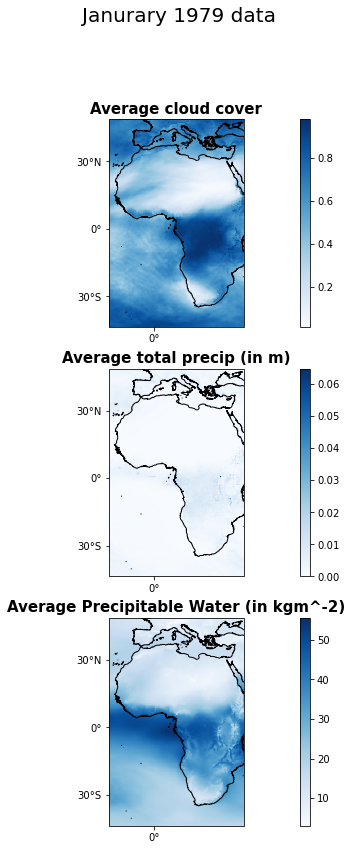

In [5]:
#Contour plots of the first time: Janurary 1979
labels = ['Average cloud cover','Average total precip (in m)', 'Average Precipitable Water (in kgm^-2)']
fig = plt.figure(figsize=(20,13))
# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
#First plot: Total Cloud Cover
ax_cloudcover = fig.add_subplot(3,1,1,projection=ccrs.PlateCarree())
xyticks(ax_cloudcover,data_lon,data_lat)
ax_cloudcover.set_extent([-20, 40, -40, 45])
coast = NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')
feature = ax_cloudcover.add_feature(coast, edgecolor='black')
plot1 = ax_cloudcover.pcolormesh(data_lon,data_lat,plot_fields[0], cmap='Blues')
ax_cloudcover.set_title(labels[0],fontsize = 15,fontweight = 'bold')
fig.colorbar(plot1,ax = ax_cloudcover)
#Second plot: Total Precip
ax_precip = fig.add_subplot(3,1,2,projection=ccrs.PlateCarree())
xyticks(ax_precip,data_lon,data_lat)
ax_precip.set_extent([-20,40,-40,45])
coast = NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')
feature = ax_precip.add_feature(coast, edgecolor='black')
plot2 = ax_precip.pcolormesh(data_lon,data_lat,plot_fields[1], cmap='Blues')
fig.colorbar(plot2,ax = ax_precip)
ax_precip.set_title(labels[1],fontsize = 15,fontweight = 'bold')
#Third plot: Precipitable Water
ax_wv = fig.add_subplot(3,1,3,projection=ccrs.PlateCarree())
xyticks(ax_wv,data_lon,data_lat)
ax_wv.set_extent([-20,40,-40,45])
coast = NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')
feature = ax_wv.add_feature(coast, edgecolor='black')
plot3 = ax_wv.pcolormesh(data_lon,data_lat,plot_fields[2], cmap='Blues')
fig.colorbar(plot3,ax = ax_wv)
ax_wv.set_title(labels[2],fontsize = 15,fontweight = 'bold')
plt.suptitle('Janurary 1979 data',x=0.7,y=1,fontsize = 20)
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/Jan1979_plots')

### Hovmoller Diagram (to visualize the seasonal cycle and ITCZ as a function of latitude)

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. 

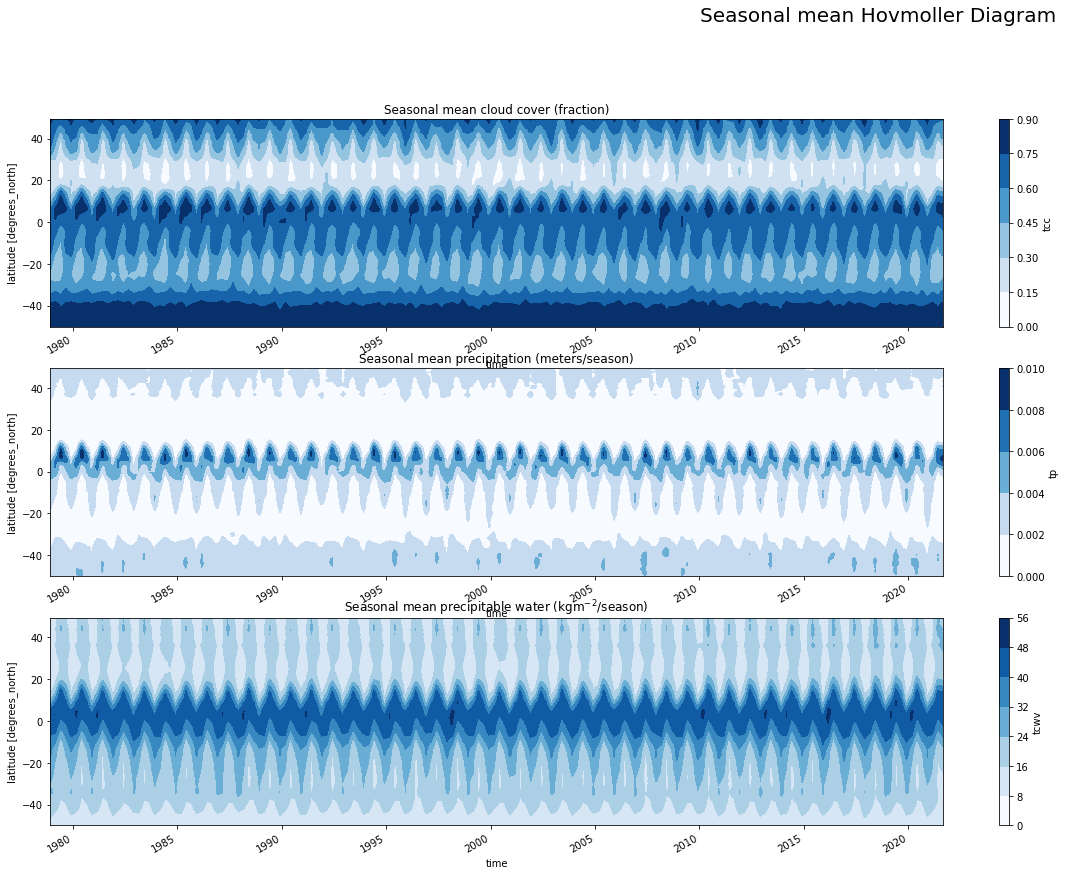

In [16]:
fig = plt.figure(figsize=(20,13))
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
ax_cloudcover = fig.add_subplot(3,1,1)
clouds=ds_mean.tcc
selection= clouds.sel(longitude=np.arange(np.nanmin(data_lon),np.nanmax(data_lon),0.5), latitude = np.arange(np.nanmin(data_lat), np.nanmax(data_lat),0.5), method = 'nearest')
quarterly_time = selection.resample(time='QS-DEC', keep_attrs=True).mean(dim=('time','longitude'))#resamples time to 171
quarterly_time.T.plot.contourf(cmap='Blues')
ax_cloudcover.set_title('Seasonal mean cloud cover (fraction)')
ax_prcp = fig.add_subplot(3,1,2)
precip=ds_mean.tp
selection_precip= precip.sel(longitude=np.arange(np.nanmin(data_lon),np.nanmax(data_lon),0.5), latitude = np.arange(np.nanmin(data_lat), np.nanmax(data_lat),0.5), method = 'nearest')
quarterly_time_precip = selection_precip.resample(time='QS-DEC', keep_attrs=True).mean(dim=('time','longitude'))#resamples time to 171
quarterly_time_precip.T.plot.contourf(cmap='Blues')
ax_prcp.set_title('Seasonal mean precipitation (meters/season)')
ax_wv = fig.add_subplot(3,1,3)
cloud_wv=ds_mean.tcwv
selection_wv= cloud_wv.sel(longitude=np.arange(np.nanmin(data_lon),np.nanmax(data_lon),0.5), latitude = np.arange(np.nanmin(data_lat), np.nanmax(data_lat),0.5), method = 'nearest')
quarterly_time_wv = selection_wv.resample(time='QS-DEC', keep_attrs=True).mean(dim=('time','longitude'))#resamples time to 171
quarterly_time_wv.T.plot.contourf(cmap='Blues')
ax_wv.set_title('Seasonal mean precipitable water (kg$\mathregular{m^{-2}}$/season)')
plt.suptitle('Seasonal mean Hovmoller Diagram',x=0.7,y=1,fontsize = 20)
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/hovmoller_diagram')